<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/decompose_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

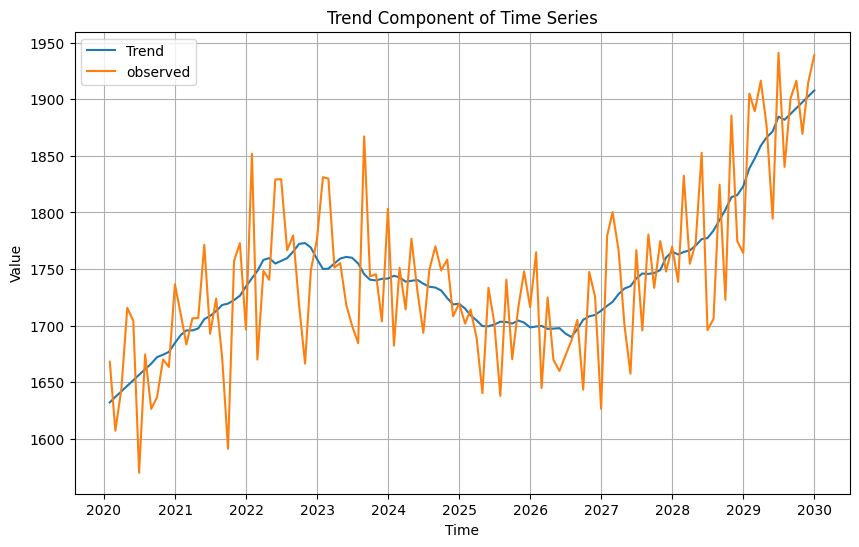

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
m=120
# Создание временного ряда с трендом, сезонностью и шумом
np.random.seed(0)
time = pd.date_range('2020-01-01', periods=m, freq='M')
trend = time.astype('int64') // 1_000_000_000_000_000 # простой линейный тренд
seasonal = 100* np.sin(np.linspace(0, 3.14*2, m)) # сезонная компонента
noise = np.random.normal(0, 50, m) # шум
data = trend + seasonal + noise
series = pd.Series(data, index=time)

# Декомпозиция временного ряда
result = seasonal_decompose(series, model='add',two_sided=True,extrapolate_trend=1)

# Визуализация только тренда
plt.figure(figsize=(10, 6))
plt.plot(result.trend, label='Trend')
# plt.plot(result.seasonal,label='Seasonal')
# plt.plot(result.resid,label='Resid')
plt.plot(result.observed,label='observed')

plt.title('Trend Component of Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()

In [295]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


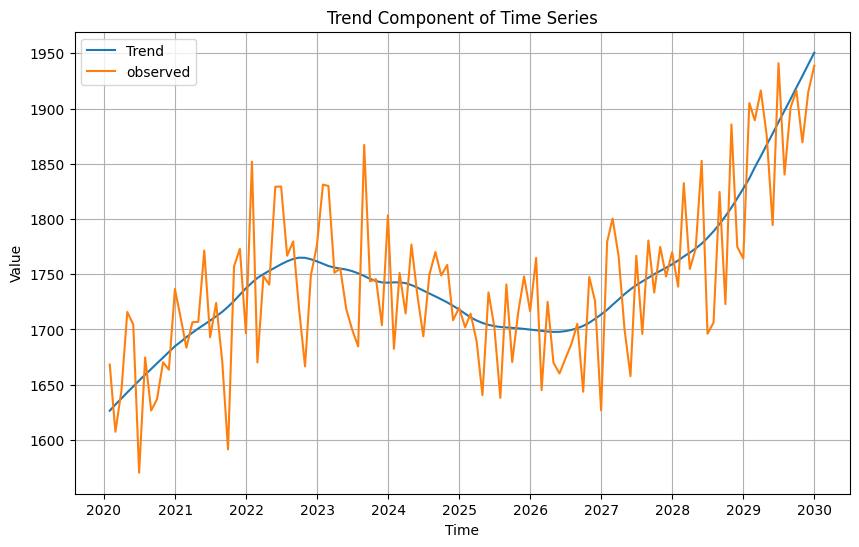

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
m=120
# Создание временного ряда с трендом, сезонностью и шумом
np.random.seed(0)
time = pd.date_range('2020-01-01', periods=m, freq='M')
trend = time.astype('int64') // 1_000_000_000_000_000 # простой линейный тренд
seasonal = 100* np.sin(np.linspace(0, 3.14*2, m)) # сезонная компонента
noise = np.random.normal(0, 50, m) # шум
data = trend + seasonal + noise
series = pd.Series(data, index=time)

# Декомпозиция временного ряда
result_1 = STL(series,period=12).fit()

# Визуализация только тренда
plt.figure(figsize=(10, 6))
plt.plot(result_1.trend, label='Trend')
# plt.plot(result_1.seasonal,label='Seasonal')
# plt.plot(result_1.resid,label='Resid')
plt.plot(result_1.observed,label='observed')

plt.title('Trend Component of Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()
plt.close()

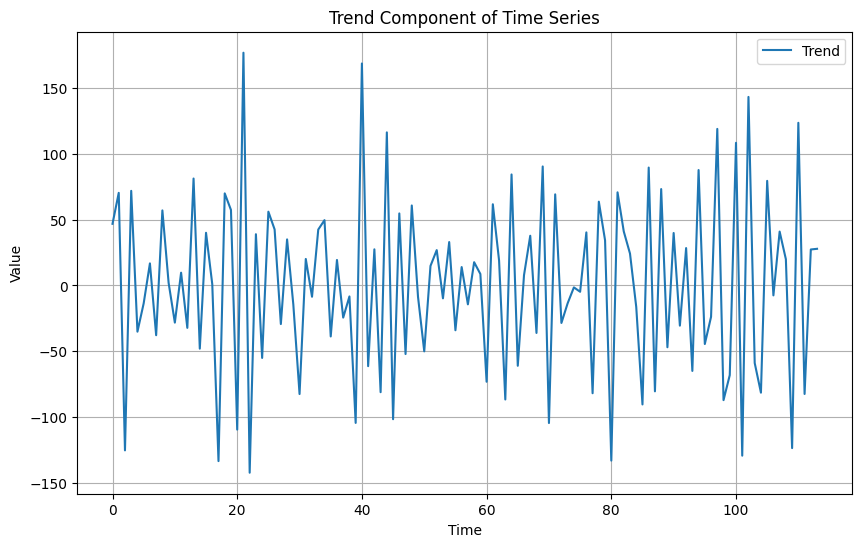

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
m=120
# Создание временного ряда с трендом, сезонностью и шумом
np.random.seed(0)
time = pd.date_range('2020-01-01', periods=m, freq='M')
trend = time.astype('int64') // 1_000_000_000_000_000 # простой линейный тренд
seasonal = 100* np.sin(np.linspace(0, 3.14*2, m)) # сезонная компонента
noise = np.random.normal(0, 50, m) # шум
data = trend + seasonal + noise
series = pd.Series(data, index=time)

# Декомпозиция временного ряда
cycles = sm.tsa.filters.bkfilter(series.values, 1.5, 8, 3)

# Визуализация только тренда
plt.figure(figsize=(10, 6))
plt.plot(cycles, label='Trend')
# plt.plot(result_1.seasonal,label='Seasonal')
# plt.plot(result_1.resid,label='Resid')
# plt.plot(result_1.observed,label='observed')

plt.title('Trend Component of Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()
plt.close()

In [298]:
cycles

array([  46.80829235,   70.30601109, -125.11352453,   71.82885764,
        -35.03492717,  -13.55150097,   16.77713845,  -37.73550466,
         56.98503339,    1.97273976,  -28.16648117,    9.7181261 ,
        -32.14769072,   81.17250424,  -47.92978075,   40.00661586,
          0.9935231 , -133.26513806,   69.91428102,   57.32019108,
       -109.35747209,  176.64371743, -142.08018259,   38.91806271,
        -54.96863716,   56.02069677,   42.56267511,  -29.25939942,
         34.98300821,  -14.40608924,  -82.37248401,   20.13368031,
         -8.53542469,   42.45381882,   49.59932316,  -38.6724007 ,
         19.37364943,  -24.37801188,   -8.31767895, -104.28320715,
        168.4795843 ,  -61.21142877,   27.44868134,  -80.9678784 ,
        116.19875228, -101.48383875,   54.69152696,  -52.01111942,
         60.72699889,   -8.61113922,  -49.98084002,   14.8558216 ,
         26.85901449,   -9.74488277,   32.96901087,  -33.96369592,
         13.98114974,  -14.29179191,   17.67657841,    8.72834

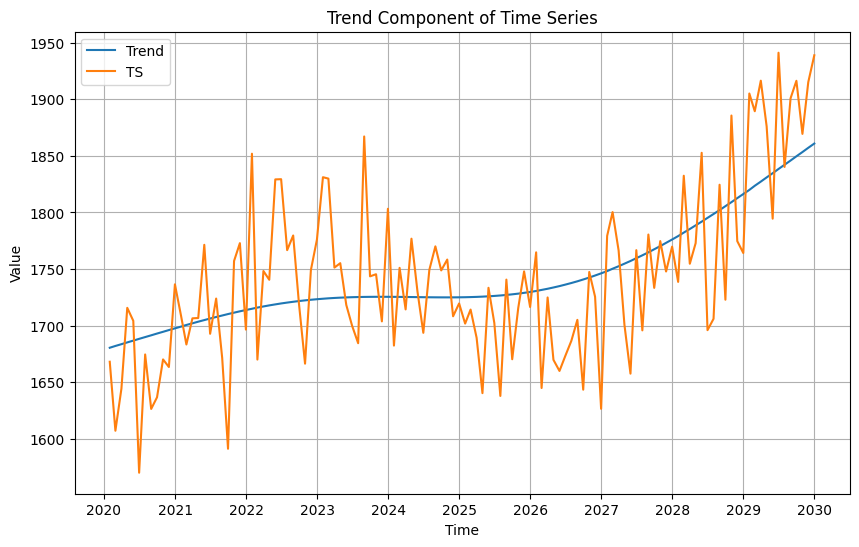

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
m=120
# Создание временного ряда с трендом, сезонностью и шумом
np.random.seed(0)
time = pd.date_range('2020-01-01', periods=m, freq='M')
trend = time.astype('int64') // 1_000_000_000_000_000 # простой линейный тренд
seasonal = 100* np.sin(np.linspace(0, 3.14*2, m)) # сезонная компонента
noise = np.random.normal(0, 50, m) # шум
data = trend + seasonal + noise
series = pd.Series(data, index=time)

# Декомпозиция временного ряда
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(series,lamb=129600)

# Визуализация только тренда
plt.figure(figsize=(10, 6))
plt.plot(gdp_trend, label='Trend')
# plt.plot(gdp_cycle, label='cycle')
plt.plot(series,label='TS')
plt.title('Trend Component of Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.legend()
plt.show()
plt.close()

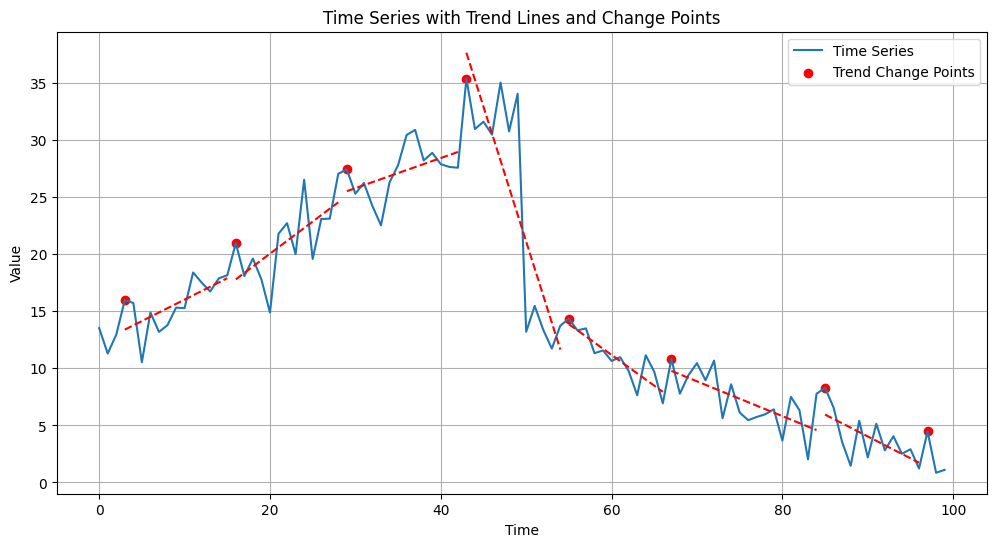

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Создание примера временного ряда с различными трендами
np.random.seed(0)
time = np.arange(0, 100, 1)
trend1 = 0.5 * time + 10  # линейный тренд
trend2 = -0.3 * time + 30  # обратный линейный тренд
data = np.concatenate((trend1[:50], trend2[50:])) + np.random.normal(0, 2, 100)

# Разбиение временного ряда на участки с помощью поиска пиков
peaks, _ = find_peaks(data, distance=10)  # найдем пики, которые будут указывать на изменения тренда

# Построение прямых линий на участках и точек пересечения
plt.figure(figsize=(12, 6))
plt.plot(data, label='Time Series')

for i in range(len(peaks)-1):
    start = peaks[i]
    end = peaks[i+1]
    x_values = np.arange(start, end)
    slope, intercept = np.polyfit(x_values, data[start:end], 1)
    plt.plot(x_values, slope*x_values + intercept, linestyle='--', color='red')

plt.scatter(peaks, data[peaks], color='red', marker='o', label='Trend Change Points')
plt.legend()
plt.title('Time Series with Trend Lines and Change Points')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

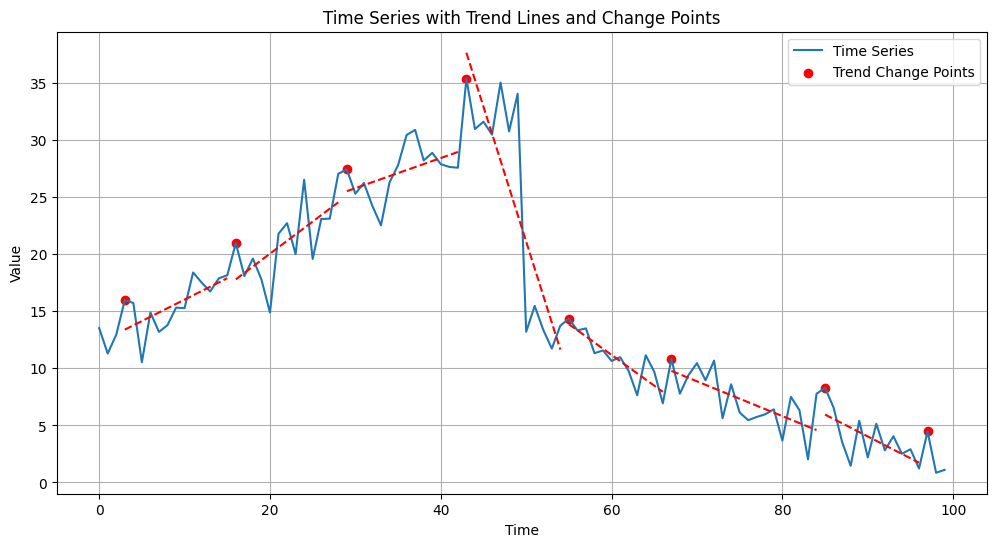

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Создание примера временного ряда с различными трендами
np.random.seed(0)
time = np.arange(0, 100, 1)
trend1 = 0.5 * time + 10  # линейный тренд
trend2 = -0.3 * time + 30  # обратный линейный тренд
data = np.concatenate((trend1[:50], trend2[50:])) + np.random.normal(0, 2, 100)

# Разбиение временного ряда на участки с помощью поиска пиков
peaks, _ = find_peaks(data, distance=10)  # найдем пики, которые будут указывать на изменения тренда

# Построение прямых линий на участках и точек пересечения
plt.figure(figsize=(12, 6))
plt.plot(data, label='Time Series')

for i in range(len(peaks)-1):
    start = peaks[i]
    end = peaks[i+1]
    x_values = np.arange(start, end)
    slope, intercept = np.polyfit(x_values, data[start:end], 1)
    plt.plot(x_values, slope*x_values + intercept, linestyle='--', color='red')

plt.scatter(peaks, data[peaks], color='red', marker='o', label='Trend Change Points')
plt.legend()
plt.title('Time Series with Trend Lines and Change Points')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [302]:
peaks

array([ 3, 16, 29, 43, 55, 67, 85, 97])

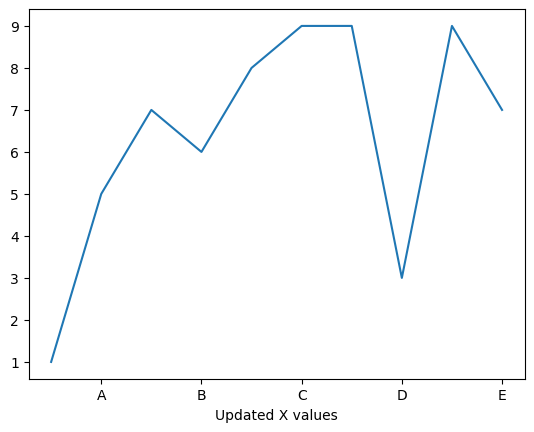

In [303]:
import matplotlib.pyplot as plt
import numpy as np

# Создание примера данных
x = np.arange(0, 10, 1)
y = np.random.randint(1, 10, size=10)

# Построение графика
plt.plot(x, y)
plt.xlabel('Original X values')

# Новые значения для оси X
new_x_values = np.array([1, 3, 5, 7, 9])  # Новые значения оси X
new_labels = ['A', 'B', 'C', 'D', 'E']  # Новые подписи для значений

# Изменение значений оси X
plt.xticks(new_x_values, new_labels)
plt.xlabel('Updated X values')

plt.show()

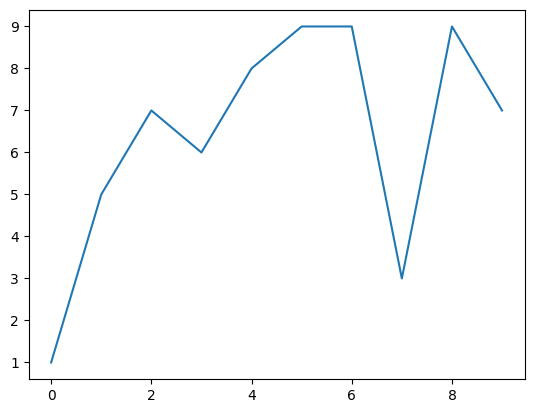

In [304]:
plt.plot(x, y)
plt.show()

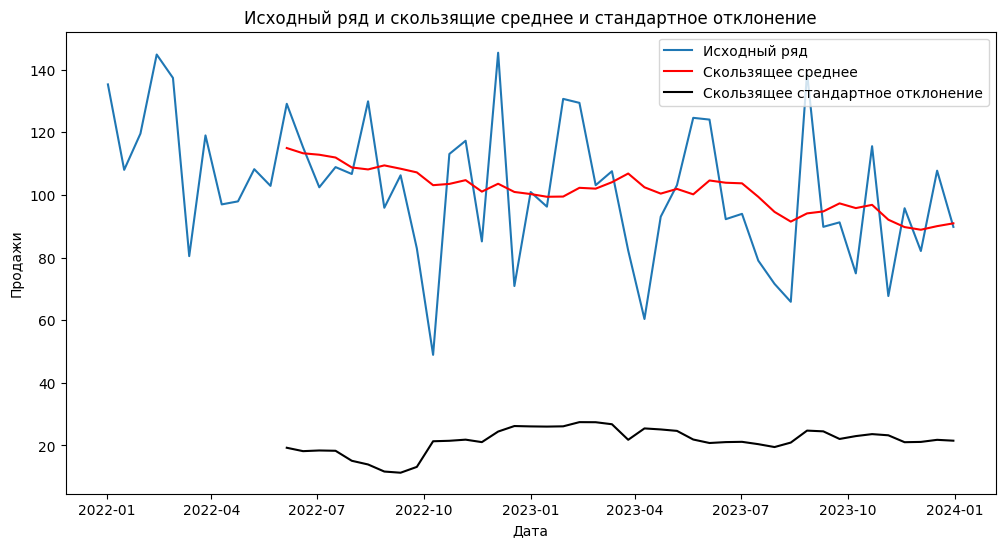

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем временной ряд (пример)
# Замените этот код своими реальными данными
# Предположим, что у вас есть DataFrame 'df' с колонкой 'sales' и индексом типа DateTime
# df = pd.read_csv('ваш_файл.csv', parse_dates=['timestamp'], index_col='timestamp')

# Пример создания случайного временного ряда
import numpy as np
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='2W')
sales = np.random.normal(loc=100, scale=20, size=len(date_range))
df = pd.DataFrame({'sales': sales}, index=date_range)

# Вычисляем скользящее среднее и стандартное отклонение
window_size = 12  # Размер окна для скользящего среднего и стандартного отклонения
rolling_mean = df['sales'].rolling(window=window_size).mean()
rolling_std = df['sales'].rolling(window=window_size).std()

# Визуализируем исходный ряд и скользящие среднее и стандартное отклонение
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Исходный ряд')
plt.plot(rolling_mean.index, rolling_mean, color='red', label='Скользящее среднее')
plt.plot(rolling_std.index, rolling_std, color='black', label='Скользящее стандартное отклонение')
plt.legend()
plt.title('Исходный ряд и скользящие среднее и стандартное отклонение')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()


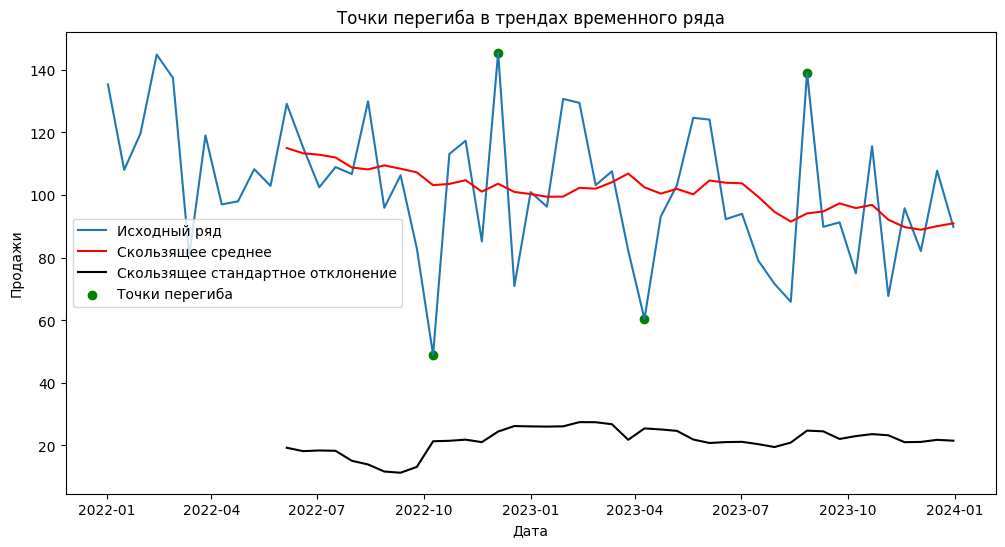

In [306]:
# Вычисляем производную скользящего стандартного отклонения
rolling_std_diff = rolling_std.diff()

# Установим порог для определения точек перегиба
threshold = 2.0  # Произвольный порог, который вы можете настроить

# Найдем индексы, где производная превышает порог
change_points = rolling_std_diff[rolling_std_diff > threshold].index

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Исходный ряд')
plt.plot(rolling_mean.index, rolling_mean, color='red', label='Скользящее среднее')
plt.plot(rolling_std.index, rolling_std, color='black', label='Скользящее стандартное отклонение')
plt.scatter(change_points, df.loc[change_points]['sales'], color='green', label='Точки перегиба')
plt.legend()
plt.title('Точки перегиба в трендах временного ряда')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()




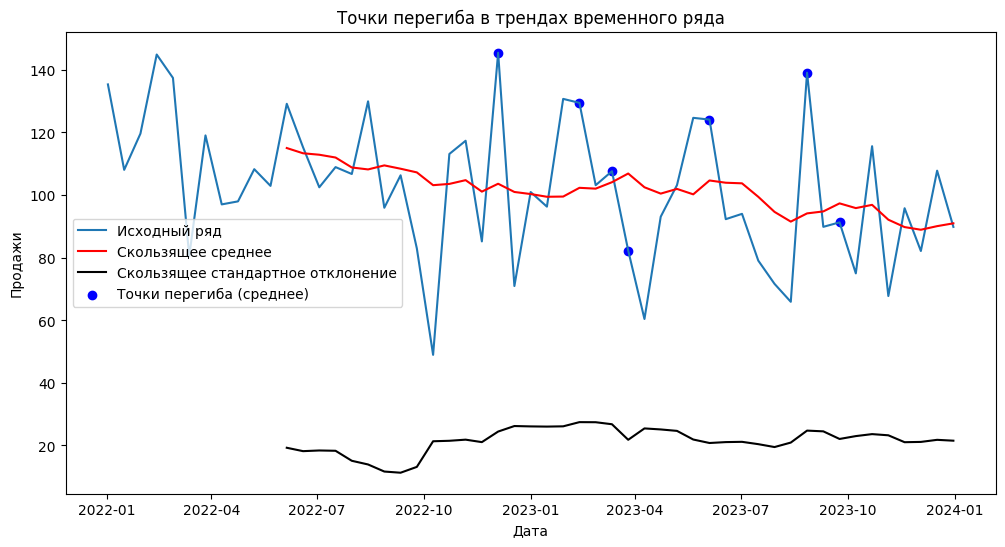

In [307]:
# Вычисляем производную скользящего среднего
rolling_mean_diff = rolling_mean.diff()

# Установим порог для определения точек перегиба
threshold = 2.0  # Произвольный порог, который вы можете настроить

# Найдем индексы, где производная превышает порог
change_points_mean = rolling_mean_diff[rolling_mean_diff > threshold].index

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Исходный ряд')
plt.plot(rolling_mean.index, rolling_mean, color='red', label='Скользящее среднее')
plt.plot(rolling_std.index, rolling_std, color='black', label='Скользящее стандартное отклонение')
plt.scatter(change_points_mean, df.loc[change_points_mean]['sales'], color='blue', label='Точки перегиба (среднее)')
plt.legend()
plt.title('Точки перегиба в трендах временного ряда')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()


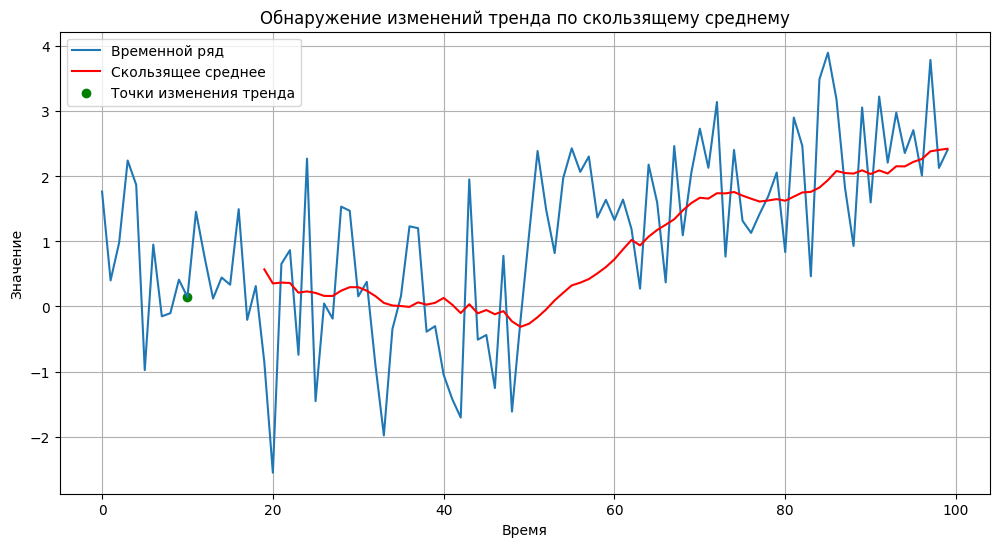

In [308]:
import numpy as np
import matplotlib.pyplot as plt

# Пример временного ряда (вы можете заменить его своим реальным временным рядом)
np.random.seed(0)
time = np.arange(100)
values = np.random.normal(loc=0, scale=1, size=100)
values[50:] += 2  # Имитация изменения тренда в середине временного ряда

# Скользящее среднее
window_size = 20
rolling_mean = np.convolve(values, np.ones(window_size)/window_size, mode='valid')

# Найдем изменения в тренде по скользящему среднему
threshold = 0.2
change_points = np.where(np.abs(np.diff(rolling_mean)) > threshold)[0] + (window_size // 2)

# Визуализация временного ряда и точек изменений тренда
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Временной ряд')
plt.plot(time[window_size-1:], rolling_mean, color='red', label='Скользящее среднее')
plt.scatter(time[change_points], values[change_points], color='green', label='Точки изменения тренда')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда по скользящему среднему')
plt.grid(True)
plt.show()



In [309]:
change_points

array([10])

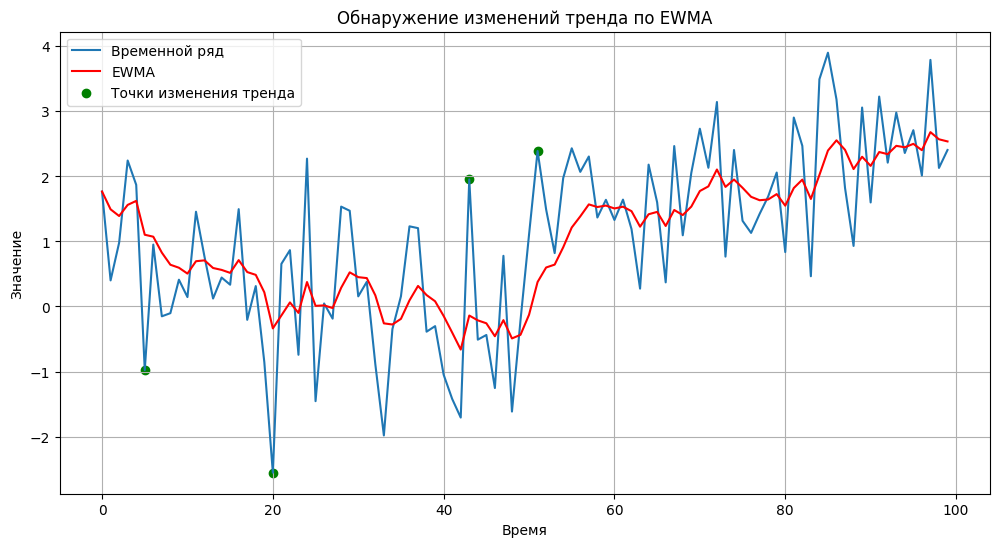

In [310]:
import numpy as np
import matplotlib.pyplot as plt

# Пример временного ряда (вы можете заменить его своим реальным временным рядом)
np.random.seed(0)
time = np.arange(100)
values = np.random.normal(loc=0, scale=1, size=100)
values[50:] += 2  # Имитация изменения тренда в середине временного ряда

# Функция для вычисления экспоненциально взвешенного скользящего среднего (EWMA)
def ewma(data, alpha):
    weighted_avg = [data[0]]  # Инициализируем первое значение средним
    for i in range(1, len(data)):
        weighted_avg.append(alpha * data[i] + (1 - alpha) * weighted_avg[-1])
    return np.array(weighted_avg)

# Параметры метода EWMA
alpha = 0.2  # Коэффициент сглаживания

# Вычисляем экспоненциально взвешенное скользящее среднее
ewma_values = ewma(values, alpha)

# Определяем изменения в тренде по EWMA
threshold = 0.5  # Порог для определения изменений в тренде
change_points = np.where(np.abs(np.diff(ewma_values)) > threshold)[0] + 1

# Визуализация временного ряда и точек изменений тренда
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Временной ряд')
plt.plot(time, ewma_values, color='red', label='EWMA')
plt.scatter(time[change_points], values[change_points], color='green', label='Точки изменения тренда')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда по EWMA')
plt.grid(True)
plt.show()



In [311]:
!pip install ruptures

50
100


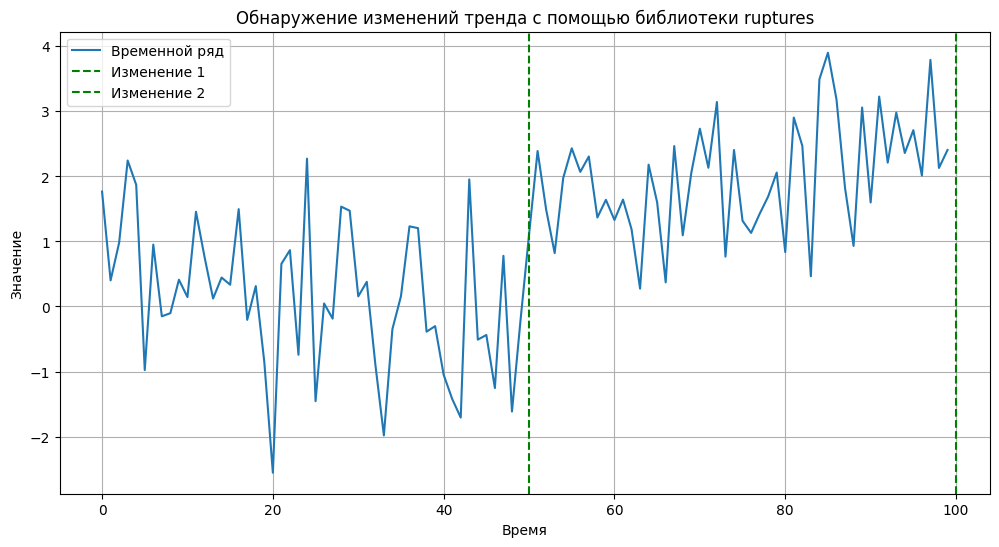

In [312]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Пример временного ряда (вы можете заменить его своим реальным временным рядом)
np.random.seed(0)
time = np.arange(100)
values = np.random.normal(loc=0, scale=1, size=100)
values[50:] += 2  # Имитация изменения тренда в середине временного ряда

# Построение модели разладки
model = rpt.Pelt(model="rbf").fit(values)
# Применение модели к данным
result = model.predict(pen=10)

# Визуализация временного ряда и точек изменения тренда
plt.figure(figsize=(12, 6))
plt.plot(time, values, label='Временной ряд')
for idx, r in enumerate(result):
    print(r)
    plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда с помощью библиотеки ruptures')
plt.grid(True)
plt.show()


In [313]:
result

[50, 100]

In [314]:
import pandas as pd

path_csv_red = '/content/drive/MyDrive/Colab Notebooks/zvezda/Server_zvezda/Dataset/series_data.csv'


# Читаем данные из CSV файла в DataFrame
df = pd.read_csv(path_csv_red)

# Преобразуем один из столбцов DataFrame в pd.Series
series_data = df['SALES VOL']  # Замените 'column_name' на имя столбца, содержащего данные
date_idx = pd.date_range(start='2022-01-01', end='2024-01-01',freq='2W-SUN')
series_data.index = date_idx[:-1]
# plt.plot(series_data)
# plt.grid()
# plt.show()

20
52


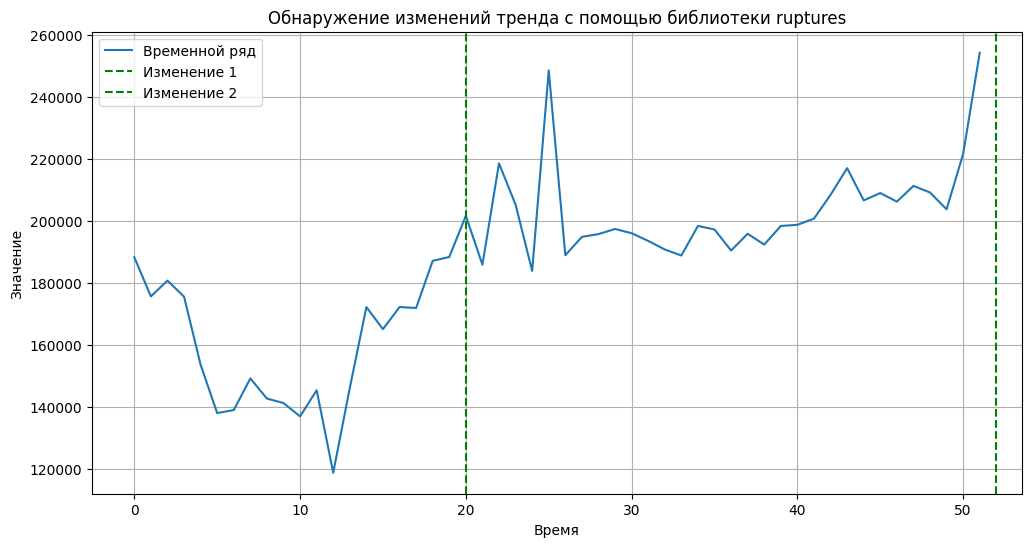

In [315]:
# Построение модели разладки
model = rpt.Pelt(model="rbf").fit(series_data.values)
# Применение модели к данным
result = model.predict(pen=5)

# Визуализация временного ряда и точек изменения тренда
plt.figure(figsize=(12, 6))
plt.plot(series_data.values, label='Временной ряд')
for idx, r in enumerate(result):
    print(r)
    plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда с помощью библиотеки ruptures')
plt.grid(True)
plt.show()


20
52


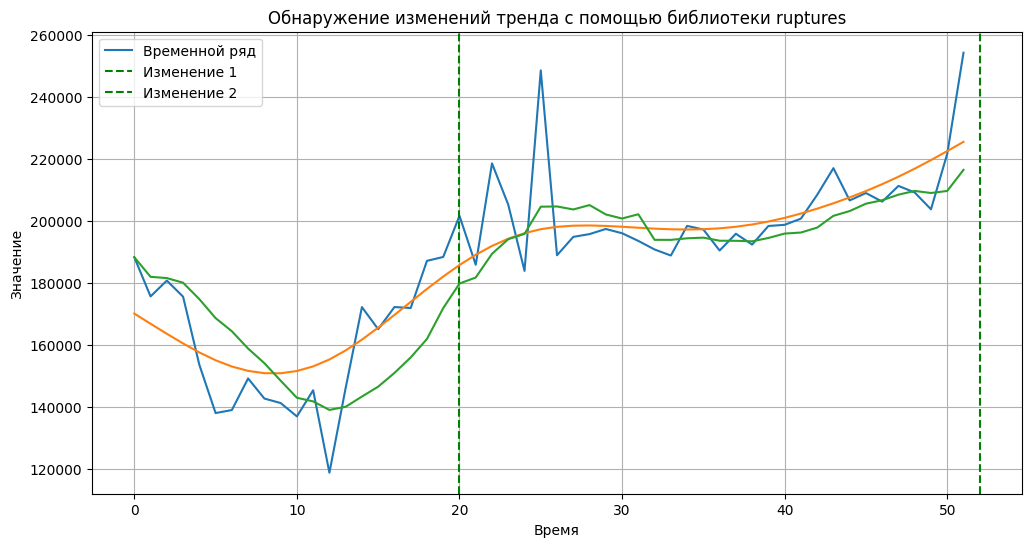

In [316]:
import statsmodels.api as sm

# Декомпозиция временного ряда
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(series_data,lamb=400)


# Построение модели разладки
model = rpt.Pelt(model="rbf").fit(series_data.values)
model_2 = rpt.Pelt(model="rbf").fit(gdp_trend.values)

# Вычисление скользящего среднего
window_size = 7 # Размер окна для скользящего среднего
rolling_mean = series_data.rolling(window=window_size, min_periods=1).mean()
# Применение модели к данным
result = model.predict(pen=5)
result_2 = model_2.predict(pen=5)

# Визуализация временного ряда и точек изменения тренда
plt.figure(figsize=(12, 6))
plt.plot(series_data.values, label='Временной ряд')
# for idx, r in enumerate(result):
#     print(r)
#     plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
for idx, r in enumerate(result_2):
    print(r)
    plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.title('Обнаружение изменений тренда с помощью библиотеки ruptures')
plt.grid(True)
plt.plot(gdp_trend.values)
plt.plot(rolling_mean.values)
plt.show()

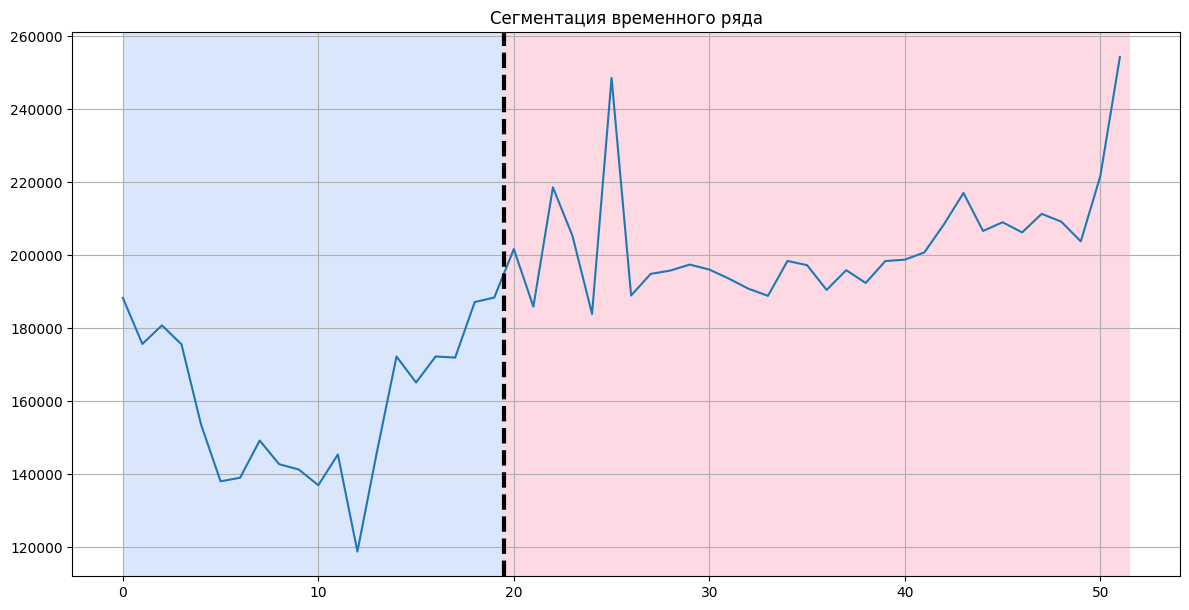

In [317]:
import statsmodels.api as sm

# Декомпозиция временного ряда
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(series_data,lamb=400)

bkps = 20

result = rpt.Window(model="rbf",width=26).fit_predict(series_data.values,pen=1.37)
# result = rpt.Pelt(model="l2",min_size=12).fit_predict(gdp_trend.values,pen=np.log(np.log(52)))
# result = rpt.Dynp(model="rbf",min_size=12).fit_predict(gdp_trend.values,n_bkps=2)


# Вычисление скользящего среднего
window_size = 7 # Размер окна для скользящего среднего
rolling_mean = series_data.rolling(window=window_size, min_periods=1).mean()

# Применение модели к данным
# rpt.display(gdp_trend.values, result,result)
rpt.display(signal=series_data.values, true_chg_pts=result,computed_chg_pts=result,figsize=(12, 6))
plt.title('Сегментация временного ряда')

plt.grid(True)
plt.show()

# # Визуализация временного ряда и точек изменения тренда
# plt.figure(figsize=(12, 6))
# plt.plot(series_data.values, label='Временной ряд')

# for idx, r in enumerate(result):
#     print(r)
#     plt.axvline(x=r, color='green', linestyle='--', label=f'Изменение {idx+1}')
# plt.xlabel('Время')
# plt.ylabel('Значение')
# plt.legend()
# plt.title('Обнаружение изменений тренда с помощью библиотеки ruptures')
# plt.grid(True)
# plt.plot(gdp_trend.values)
# plt.plot(rolling_mean.values)
# plt.show()

In [318]:
result

[20, 52]

In [319]:
result

[20, 52]

In [320]:
point_change = series_data[result[0]:result[0]+1]
point_change.index[0]

Timestamp('2022-10-09 00:00:00')

In [321]:
pd.Timestamp('2024-05-15 12:30:00')

Timestamp('2024-05-15 12:30:00')

In [322]:
len_s = series_data[:result[0]].shape[0]
len_s

20

In [323]:
series_data[result[0]:]

2022-10-09    201635.200
2022-10-23    185857.820
2022-11-06    218548.100
2022-11-20    205237.950
2022-12-04    183870.700
2022-12-18    248539.690
2023-01-01    188923.460
2023-01-15    194840.900
2023-01-29    195746.450
2023-02-12    197391.470
2023-02-26    196023.070
2023-03-12    193542.240
2023-03-26    190778.440
2023-04-09    188828.790
2023-04-23    198382.730
2023-05-07    197226.730
2023-05-21    190443.420
2023-06-04    195852.350
2023-06-18    192361.730
2023-07-02    198358.640
2023-07-16    198730.000
2023-07-30    200730.930
2023-08-13    208400.820
2023-08-27    217010.875
2023-09-10    206605.530
2023-09-24    208988.285
2023-10-08    206208.420
2023-10-22    211287.410
2023-11-05    209159.320
2023-11-19    203741.275
2023-12-03    221647.865
2023-12-17    254249.660
Freq: 2W-SUN, Name: SALES VOL, dtype: float64

In [324]:
series_data[result[0]:result[0]+series_data[:result[0]].shape[0]]

2022-10-09    201635.20
2022-10-23    185857.82
2022-11-06    218548.10
2022-11-20    205237.95
2022-12-04    183870.70
2022-12-18    248539.69
2023-01-01    188923.46
2023-01-15    194840.90
2023-01-29    195746.45
2023-02-12    197391.47
2023-02-26    196023.07
2023-03-12    193542.24
2023-03-26    190778.44
2023-04-09    188828.79
2023-04-23    198382.73
2023-05-07    197226.73
2023-05-21    190443.42
2023-06-04    195852.35
2023-06-18    192361.73
2023-07-02    198358.64
Freq: 2W-SUN, Name: SALES VOL, dtype: float64

In [325]:

concat_df = pd.concat([series_data[result[0]:result[0]+len(series_data[:result[0]])],
                       series_data[result[0]:]],
                       ignore_index=True
                       )
concat_df.index = series_data.index
concat_df

2022-01-02    201635.200
2022-01-16    185857.820
2022-01-30    218548.100
2022-02-13    205237.950
2022-02-27    183870.700
2022-03-13    248539.690
2022-03-27    188923.460
2022-04-10    194840.900
2022-04-24    195746.450
2022-05-08    197391.470
2022-05-22    196023.070
2022-06-05    193542.240
2022-06-19    190778.440
2022-07-03    188828.790
2022-07-17    198382.730
2022-07-31    197226.730
2022-08-14    190443.420
2022-08-28    195852.350
2022-09-11    192361.730
2022-09-25    198358.640
2022-10-09    201635.200
2022-10-23    185857.820
2022-11-06    218548.100
2022-11-20    205237.950
2022-12-04    183870.700
2022-12-18    248539.690
2023-01-01    188923.460
2023-01-15    194840.900
2023-01-29    195746.450
2023-02-12    197391.470
2023-02-26    196023.070
2023-03-12    193542.240
2023-03-26    190778.440
2023-04-09    188828.790
2023-04-23    198382.730
2023-05-07    197226.730
2023-05-21    190443.420
2023-06-04    195852.350
2023-06-18    192361.730
2023-07-02    198358.640


In [326]:
series_data[result[0]:result[0]+len(series_data[:result[0]])].values

array([201635.2 , 185857.82, 218548.1 , 205237.95, 183870.7 , 248539.69,
       188923.46, 194840.9 , 195746.45, 197391.47, 196023.07, 193542.24,
       190778.44, 188828.79, 198382.73, 197226.73, 190443.42, 195852.35,
       192361.73, 198358.64])

In [327]:
series_data[result[0]:].values

array([201635.2  , 185857.82 , 218548.1  , 205237.95 , 183870.7  ,
       248539.69 , 188923.46 , 194840.9  , 195746.45 , 197391.47 ,
       196023.07 , 193542.24 , 190778.44 , 188828.79 , 198382.73 ,
       197226.73 , 190443.42 , 195852.35 , 192361.73 , 198358.64 ,
       198730.   , 200730.93 , 208400.82 , 217010.875, 206605.53 ,
       208988.285, 206208.42 , 211287.41 , 209159.32 , 203741.275,
       221647.865, 254249.66 ])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


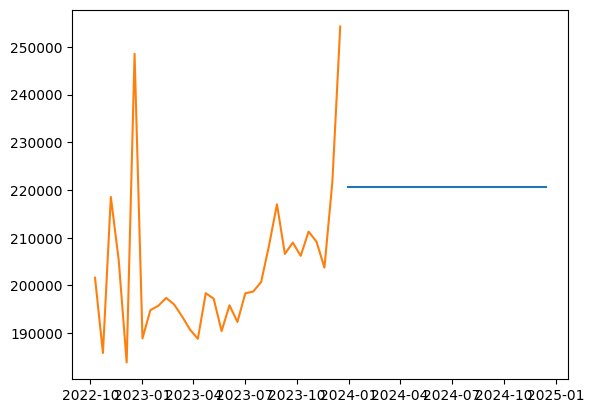

In [328]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
additive_model = ExponentialSmoothing(
        series_data[result[0]:],
        # trend="add",
        # seasonal='add',
        # seasonal_periods=len(series_data[result[0]:])//2,  # 26
        # seasonal_periods=12,
        # damped_trend=True,
        # initialization_method='estimated',
        dates=series_data[result[0]:].index).fit()  # optimized=
additive_forecast = additive_model.forecast(26)
plt.plot(additive_forecast,label='prognoz')
plt.plot(series_data[result[0]:],label='train')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


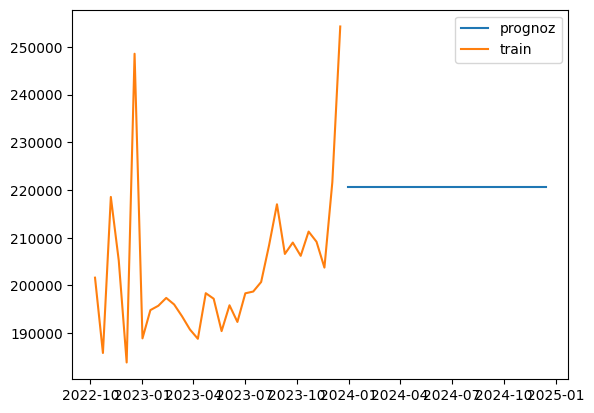

In [329]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
additive_model = SimpleExpSmoothing(
        series_data[result[0]:],
        initialization_method='estimated'
        ).fit()  # optimized=
additive_forecast = additive_model.forecast(26)
plt.plot(additive_forecast,label='prognoz')
plt.plot(series_data[result[0]:],label='train')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


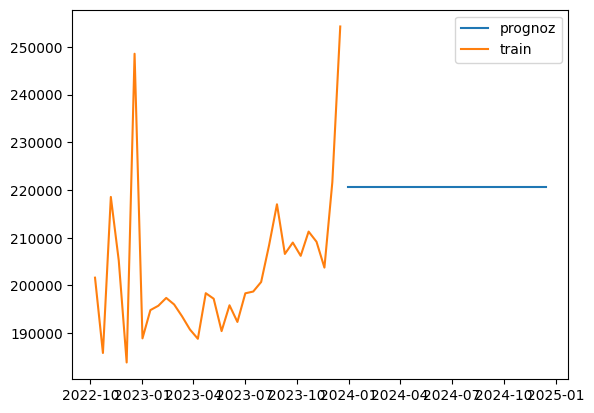

In [330]:
from statsmodels.tsa.holtwinters import Holt
additive_model = SimpleExpSmoothing(
        series_data[result[0]:],
        initialization_method='estimated'
        ).fit()  # optimized=
additive_forecast = additive_model.forecast(26)
plt.plot(additive_forecast,label='prognoz')
plt.plot(series_data[result[0]:],label='train')
plt.legend()
plt.show()

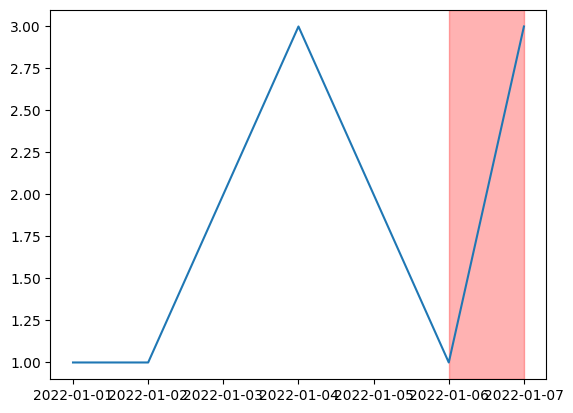

In [331]:
import matplotlib.pyplot as plt
import pandas as pd

# Создаем пример Series
data = [1,1,2,3,2,1,3]
ins = pd.date_range(start='2022-01-01',periods=7,freq='D')
s = pd.Series(data=data,index=ins)

# Построение графика
plt.plot(s)

# Получение последнего индекса и максимального индекса
last_index = s.index[-2]
max_index = s.index.max()

# Раскрашивание фона графика
plt.axvspan(last_index, max_index, color='red', alpha=0.3)

# Отображение графика
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


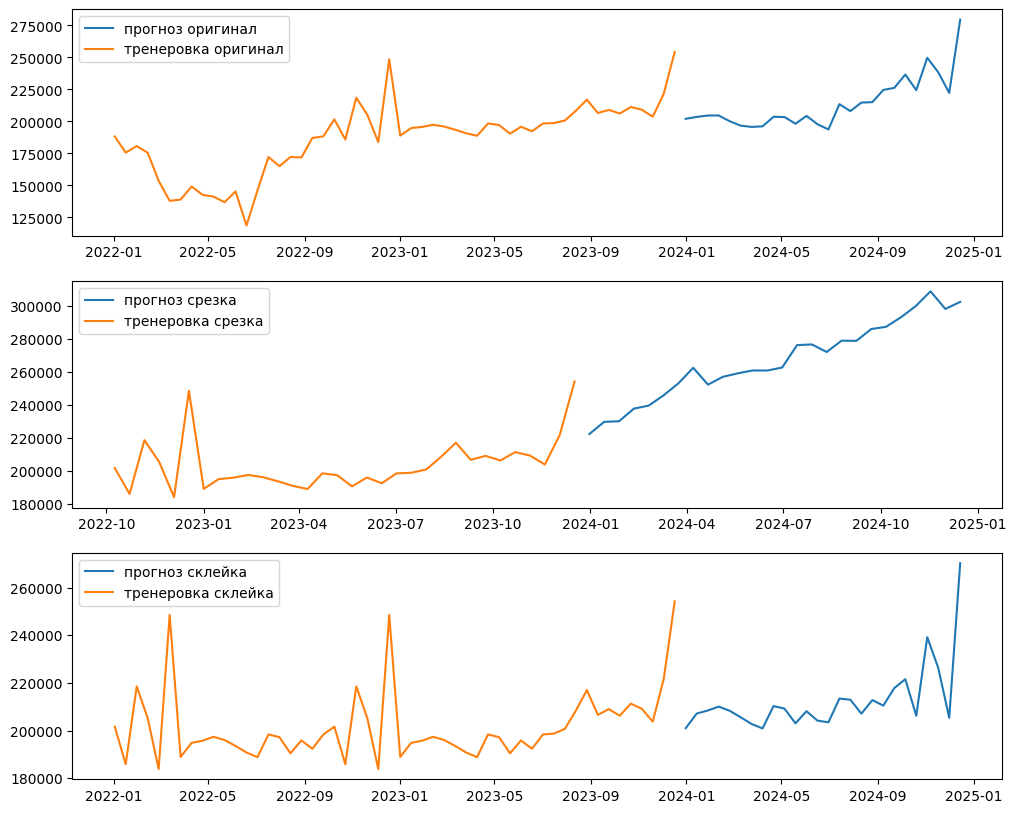

In [332]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
additive_model_concat = ExponentialSmoothing(
        concat_df,
        trend="add",
        seasonal='add',
        seasonal_periods=len(concat_df)//2,  # 26
        # seasonal_periods=12,
        damped_trend=True,
        initialization_method='estimated',
        dates=concat_df.index).fit()  # optimized=
additive_forecast_concat = additive_model_concat.forecast(26)

additive_model = ExponentialSmoothing(
        series_data[result[0]:],
        trend="add",
        seasonal='add',
        seasonal_periods=len(series_data[result[0]:])//2,  # 26
        # seasonal_periods=12,
        damped_trend=True,
        initialization_method='estimated',
        dates=series_data[result[0]:].index).fit()  # optimized=
additive_forecast = additive_model.forecast(26)

additive_model_org = ExponentialSmoothing(
        series_data,
        trend="add",
        seasonal='add',
        seasonal_periods=len(series_data)//2,  # 26
        # seasonal_periods=12,
        damped_trend=True,
        initialization_method='estimated',
        dates=series_data.index).fit()  # optimized=
additive_forecast_org = additive_model_org.forecast(26)


# Создание фигуры и подграфиков
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

axs[0].plot(additive_forecast_org, label='прогноз оригинал')
axs[0].plot(series_data, label='тренеровка оригинал')
axs[0].legend()

axs[1].plot(additive_forecast, label='прогноз срезка')
axs[1].plot(series_data[result[0]:], label='тренеровка срезка')
axs[1].legend()



plt.plot(additive_forecast_concat,label='прогноз склейка')
plt.plot(concat_df,label='тренеровка склейка')
plt.legend()

plt.show()

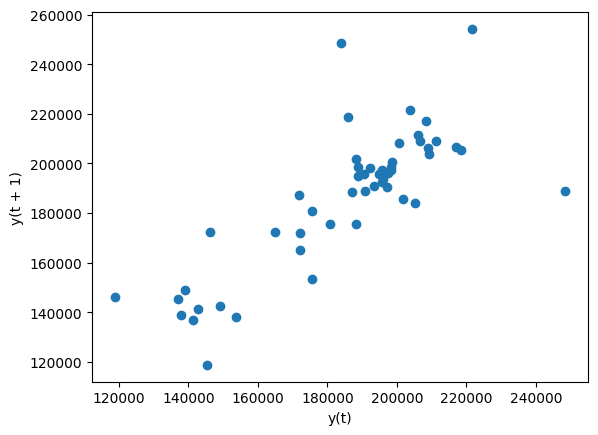

In [333]:
for i in range(1,2):
    pd.plotting.lag_plot(series_data, lag=i)
    plt.show()

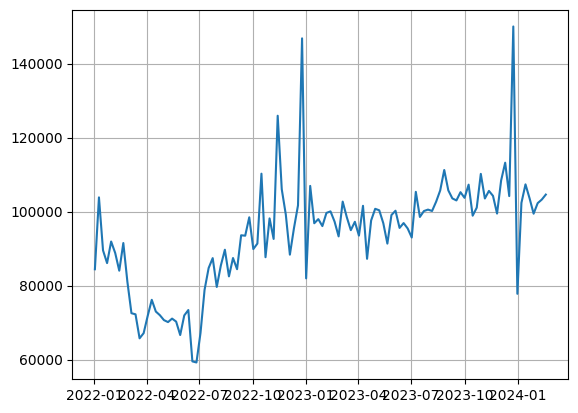

In [334]:
import pandas as pd

ts_csv_red = '/content/drive/MyDrive/Colab Notebooks/zvezda/Server_zvezda/Dataset/ts.csv'


# Читаем данные из CSV файла в DataFrame
df_y = pd.read_csv(ts_csv_red)

# Преобразуем один из столбцов DataFrame в pd.Series
series_data_new = df_y['SALES VOL']  # Замените 'column_name' на имя столбца, содержащего данные
date_idx_new = pd.date_range(start='2022-01-01',periods=112,freq='W')
series_data_new.index = date_idx_new
series_data_new
plt.plot(series_data_new)
plt.grid()
plt.show()

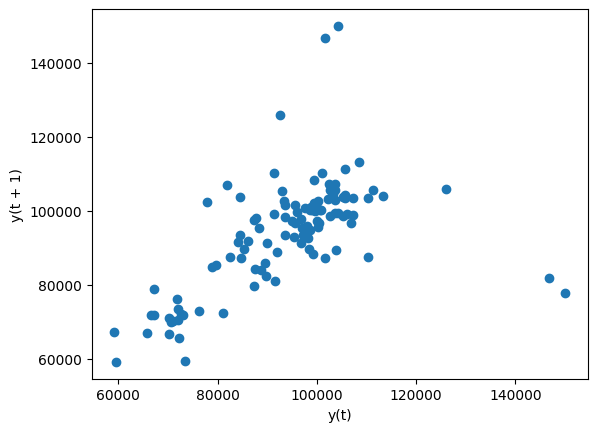

In [335]:
for i in range(1,2):
    pd.plotting.lag_plot(series_data_new, lag=i)
    plt.show()

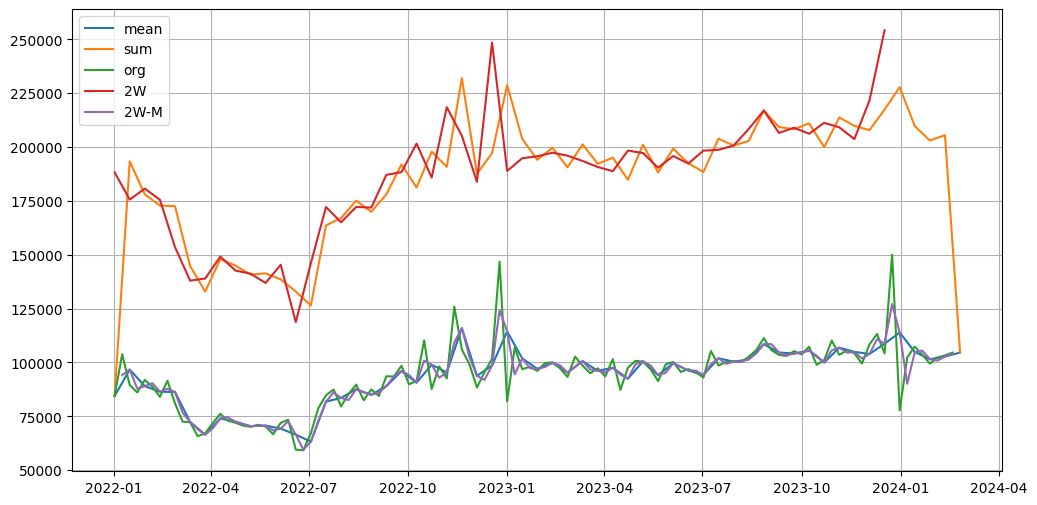

In [336]:
plt.figure(figsize=(12,6))
plt.plot(series_data_new.resample('2W').mean(), label='mean')
plt.plot(series_data_new.resample('2W').sum(), label='sum')
plt.plot(series_data_new,label='org')
plt.plot(series_data,label='2W')
plt.plot(series_data_new.rolling(2).mean(),label='2W-M')

plt.legend()
plt.grid()
plt.show()


In [337]:
# series_data[result[0]:result[0]+series_data[:result[0]].shape[0]]
# concat_df = pd.concat([series_data[result[0]:result[0]+len(series_data[:result[0]])],
#                        series_data[result[0]:]],
#                        ignore_index=True
#                        )
# concat_df.index = series_data.index
# plt.plot(concat_df)

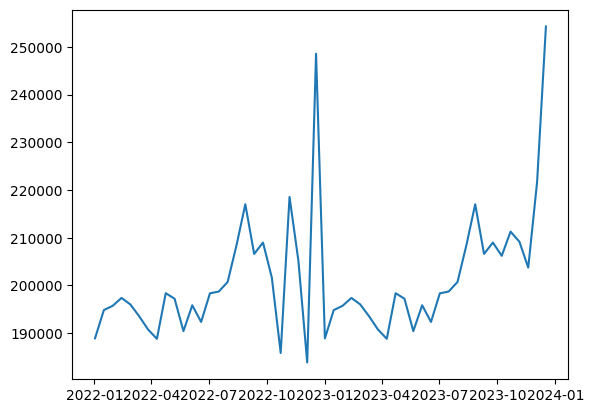

In [338]:
concat_df_new = pd.concat([series_data[result[0] + (len(series_data)//2) - result[0]:result[0]+series_data[:result[0]].shape[0] +(len(series_data)//2) - result[0]],
                       series_data[result[0]:]],
                       ignore_index=True
                       )
concat_df_new.index = series_data.index
plt.plot(concat_df_new)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


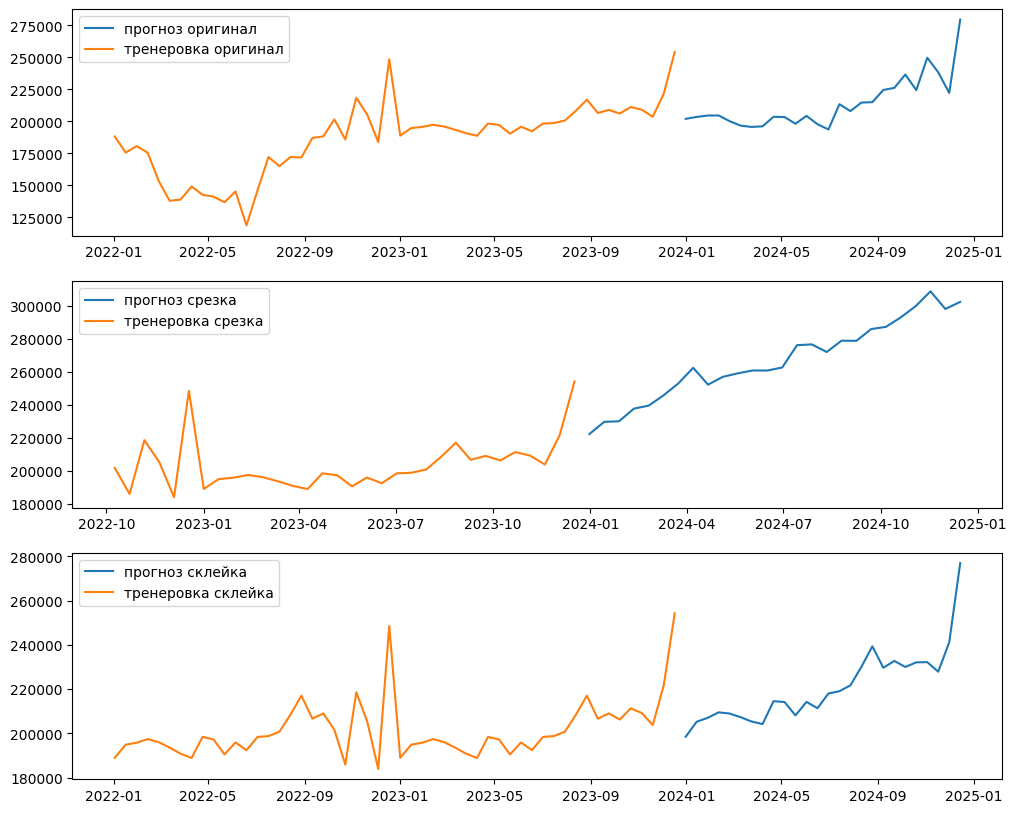

In [339]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
additive_model_concat = ExponentialSmoothing(
        concat_df_new,
        trend="add",
        seasonal='add',
        seasonal_periods=len(concat_df)//2,  # 26
        # seasonal_periods=12,
        damped_trend=True,
        # initialization_method='estimated',
        # use_boxcox=True,
        dates=concat_df_new.index).fit()  # optimized=
additive_forecast_concat = additive_model_concat.forecast(26)

additive_model = ExponentialSmoothing(
        series_data[result[0]:],
        trend="add",
        seasonal='add',
        seasonal_periods=len(series_data[result[0]:])//2,  # 26
        # seasonal_periods=12,
        damped_trend=True,
        initialization_method='estimated',
        dates=series_data[result[0]:].index).fit()  # optimized=
additive_forecast = additive_model.forecast(26)

additive_model_org = ExponentialSmoothing(
        series_data,
        trend="add",
        seasonal='add',
        seasonal_periods=len(series_data)//2,  # 26
        # seasonal_periods=12,
        damped_trend=True,
        initialization_method='estimated',
        dates=series_data.index).fit()  # optimized=
additive_forecast_org = additive_model_org.forecast(26)


# Создание фигуры и подграфиков
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

axs[0].plot(additive_forecast_org, label='прогноз оригинал')
axs[0].plot(series_data, label='тренеровка оригинал')
axs[0].legend()

axs[1].plot(additive_forecast, label='прогноз срезка')
axs[1].plot(series_data[result[0]:], label='тренеровка срезка')
axs[1].legend()



plt.plot(additive_forecast_concat,label='прогноз склейка')
plt.plot(concat_df_new,label='тренеровка склейка')
plt.legend()

plt.show()

In [340]:
gf = concat_df_new

In [341]:
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, wilcoxon

_, pvalue_t = ttest_ind(concat_df_new[:26],concat_df_new[:26],equal_var=False)


if pvalue_t < 0.05:
    res_tt_test = f'{pvalue_t.round(3)} Средние значения разное (Welch’s t-test) для разнородных дисперсий, норм. распред.'
else:
    res_tt_test = f'{pvalue_t.round(3)} Средние значения одинаковое (Welch’s t-test) для разнородных дисперсий, норм. распред.'
res_tt_test



'1.0 Средние значения одинаковое (Welch’s t-test) для разнородных дисперсий, норм. распред.'

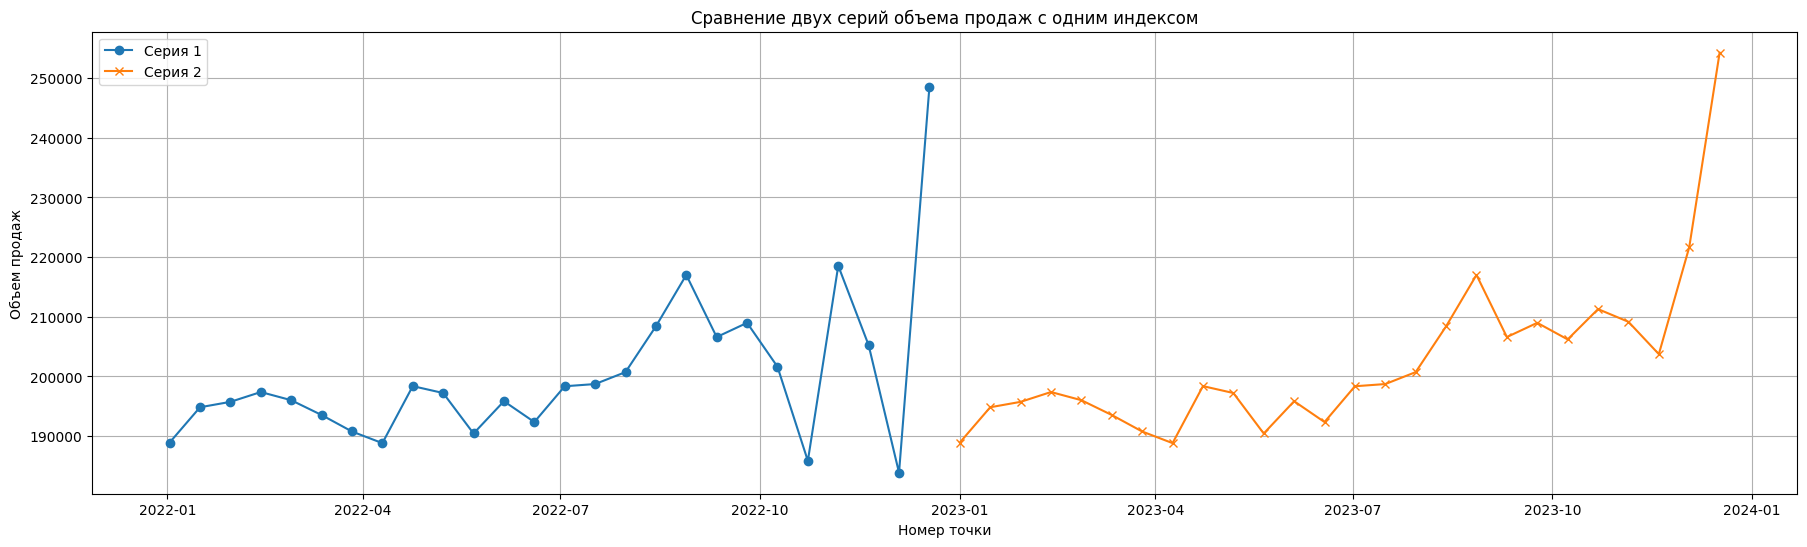

In [342]:
import seaborn as sns

plt.figure(figsize=(22, 6))
plt.plot(concat_df_new[:26], marker='o', label='Серия 1')
plt.plot(concat_df_new[26:], marker='x', label='Серия 2')
plt.title(
    f'Сравнение двух серий объема продаж с одним индексом')
plt.xlabel('Номер точки')
plt.ylabel('Объем продаж')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-343-a11e3cfe1206>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concat_df_new[:26], hist=False, kde=True, label='Серия 1')
<ipython-input-343-a11e3cfe1206>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concat_df_new[26:], hist=False, kde=True, label='Серия 

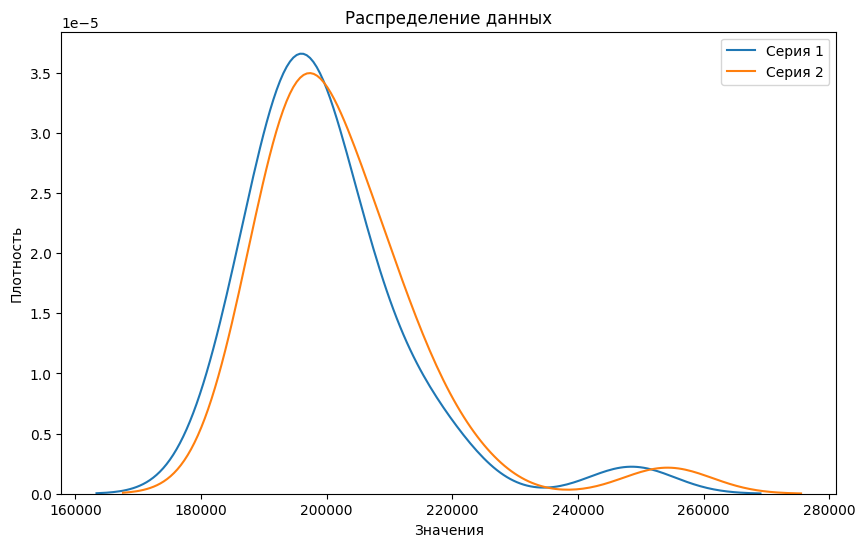

In [343]:
plt.figure(figsize=(10, 6))
sns.distplot(concat_df_new[:26], hist=False, kde=True, label='Серия 1')
sns.distplot(concat_df_new[26:], hist=False, kde=True, label='Серия 2')
plt.legend()
plt.title('Распределение данных')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


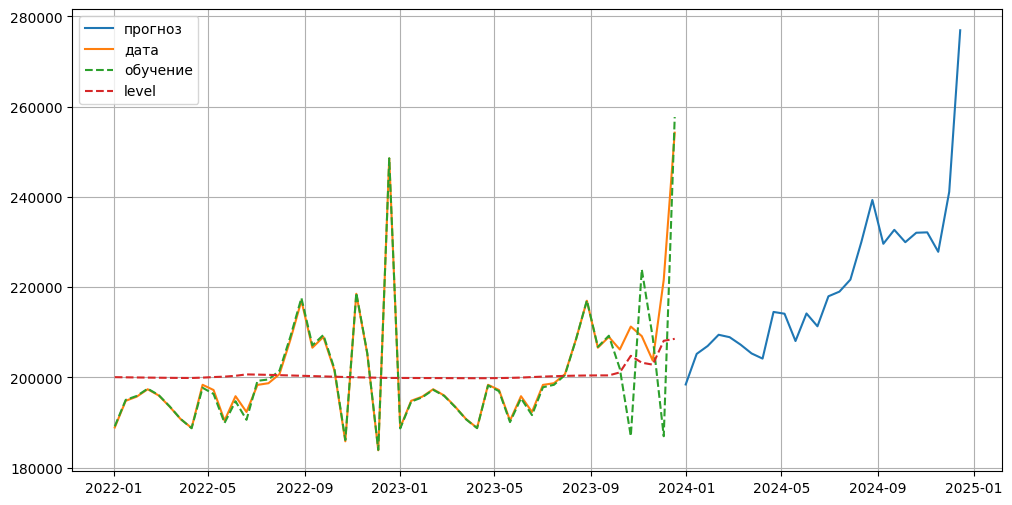

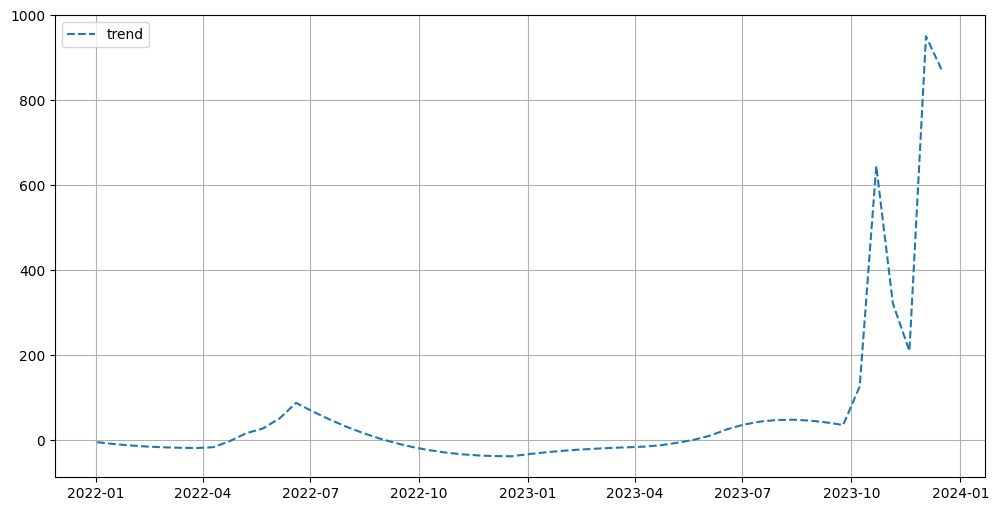

In [406]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# # Снижение начального значения тренда
# initial_trend = (concat_df_new.iloc[1] - concat_df_new.iloc[0]) * 0.5
# initial_seasonal = [0] * 26


additive_model_concat = ExponentialSmoothing(
        concat_df_new,
        trend="add",
        seasonal='add',
        seasonal_periods=len(concat_df)//2,  # 26
        # seasonal_periods=12,
        damped_trend=True,
        initialization_method='estimated',
        # initial_trend=0,


        # initialization_method='known',
        # initial_level=concat_df_new.iloc[0],
        # initial_trend=initial_trend,
        # initial_seasonal=initial_seasonal,
        dates=concat_df.index).fit()  # optimized=

additive_forecast_concat = additive_model_concat.forecast(26)
plt.figure(figsize=(12,6))
plt.plot(additive_forecast_concat,label='прогноз')
plt.plot(concat_df_new, label='дата')
# plt.plot(additive_model_concat.resid, label='resid')
plt.plot(additive_model_concat.fittedvalues, label='обучение', linestyle='--')
# plt.plot(additive_model_concat.trend, label='trend', linestyle='--')
plt.plot(additive_model_concat.level, label='level', linestyle='--')



plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
# plt.plot(additive_forecast_concat,label='data')
# plt.plot(concat_df_new, label='test')
# plt.plot(additive_model_concat.resid, label='resid')
# plt.plot(additive_model_concat.fittedvalues, label='train', linestyle='--')
plt.plot(additive_model_concat.trend, label='trend', linestyle='--')
# plt.plot(additive_model_concat.season, label='season', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

In [345]:
additive_model_concat.params

{'smoothing_level': 0.14642857142857144,
 'smoothing_trend': 0.14642857142857144,
 'smoothing_seasonal': 0.8535714285714285,
 'damping_trend': 0.99,
 'initial_level': 200109.8584615384,
 'initial_trend': 1.0913936421275137e-11,
 'initial_seasons': array([-10946.00766272,  -5028.56766272,  -4123.01766272,  -2477.99766272,
         -3846.39766272,  -6327.22766272,  -9091.02766272, -11128.62420118,
         -2151.66131657,  -3616.13843195, -10190.11275888,  -5478.88448964,
         -9805.79554734,  -1510.82766272,  -1139.46766272,    861.46233728,
          8531.35233728,  17141.40733728,   6736.06233728,   9118.81733728,
          1765.73233728, -14011.64766272,  18678.63233728,   5368.48233728,
        -15998.76766272,  48670.22233728]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [346]:
concat_df_new.mean()

201313.7909615385

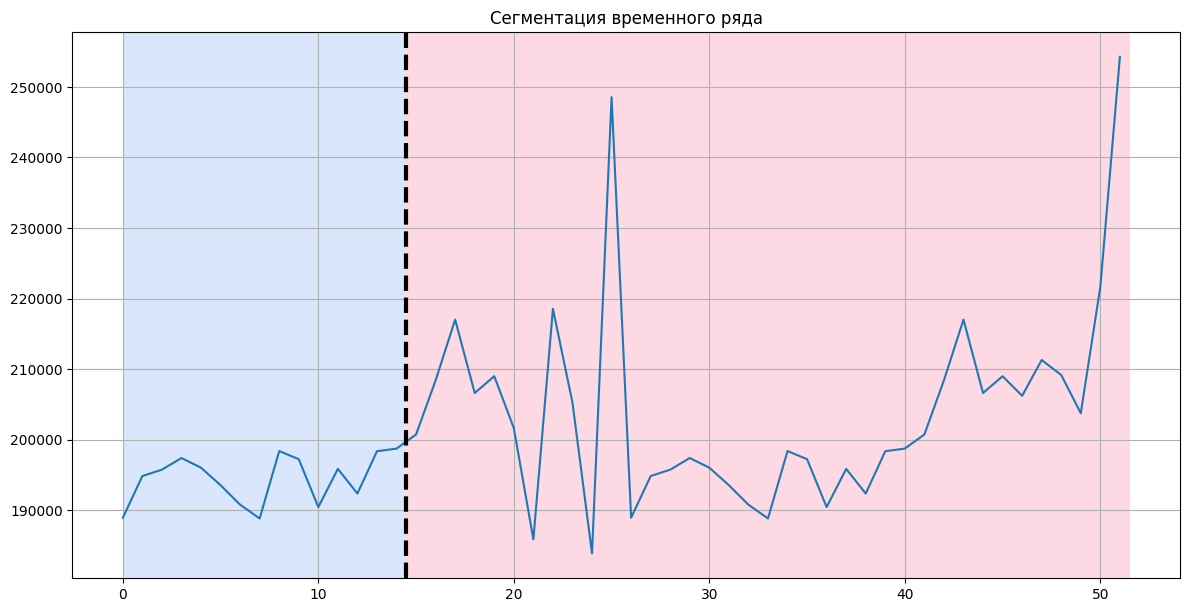

In [347]:
result = rpt.Window(model="rbf",width=26).fit_predict(concat_df_new.values,pen=1.37)
rpt.display(signal=concat_df_new.values, true_chg_pts=result,computed_chg_pts=result,figsize=(12, 6))
plt.title('Сегментация временного ряда')

plt.grid(True)
plt.show()

In [348]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [371]:
concat_df_new_1=concat_df_new[:len(concat_df_new)//2]
concat_df_new_2=concat_df_new[len(concat_df_new)//2:]
mean_df = pd.DataFrame()
mean_df['s1']=concat_df_new[:len(concat_df_new)//2].values
mean_df['s2']=concat_df_new[len(concat_df_new)//2:].values
mean_df['mean']=mean_df['s1']+mean_df['s2']/26
mean_df.index=additive_forecast_concat.index
mean_df

,s1,s2,mean
2023-12-31,188923.460,188923.460,196189.746923
2024-01-14,194840.900,194840.900,202334.780769
2024-01-28,195746.450,195746.450,203275.159615
2024-02-11,197391.470,197391.470,204983.449615
2024-02-25,196023.070,196023.070,203562.418846
2024-03-10,193542.240,193542.240,200986.172308
2024-03-24,190778.440,190778.440,198116.072308
2024-04-07,188828.790,188828.790,196091.435769
2024-04-21,198382.730,198382.730,206012.835000
2024-05-05,197226.730,197226.730,204812.373462


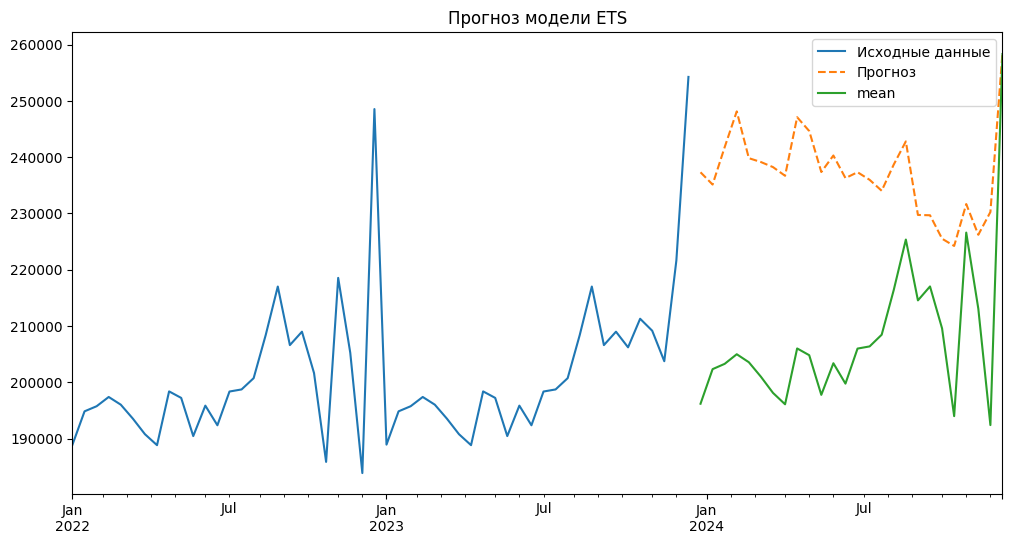

In [372]:
# Создание и обучение модели ETS
model = ETSModel(
    concat_df_new,
    error='add',
    trend='add',
    seasonal='add',
    damped_trend=True,
    seasonal_periods=26
).fit()

# Прогнозирование на 12 периодов вперед
forecast = model.forecast(steps=26)

# Визуализация прогноза
concat_df_new.plot(label='Исходные данные',figsize=(12,6))
forecast.plot(label='Прогноз', linestyle='--')
mean_df['mean'].plot(label='mean')
plt.legend()
plt.title('Прогноз модели ETS')
plt.show()


In [400]:
model_base = ExponentialSmoothing(
        concat_df_new,
        trend="add",
        seasonal='add',
        seasonal_periods=26,
        damped_trend=True,
        initialization_method='estimated'

    ).fit()

    # Делаем прогнозы
forecast_base = model_base.forecast(26)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [401]:
model_not_trend = ExponentialSmoothing(
        concat_df_new,

        seasonal='add',
        seasonal_periods=26,

        initialization_method='estimated'

    ).fit()

    # Делаем прогнозы
forecast_not_trend = model_not_trend.forecast(26)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [402]:
def mae_loss_mean(params, time_series, test_data):

    # Распаковка параметров
    smoothing_level, smoothing_trend, smoothing_seasonal, damping_trend = params
    param_month_week= 26
    # Создание модели с заданными параметрами

    model = ExponentialSmoothing(
        time_series,
        trend="add",
        seasonal='add',
        seasonal_periods=param_month_week,
        damped_trend=True,
        initialization_method='estimated'

    ).fit(smoothing_level=smoothing_level,
          smoothing_trend=smoothing_trend,
          smoothing_seasonal=smoothing_seasonal,
          damping_trend=damping_trend)

    # Делаем прогнозы
    forecast = model.forecast(param_month_week)
    mae = np.abs(time_series.mean() - forecast.mean())
    # mae = np.abs(np.median(time_series) - np.median(forecast))

    return mae


In [403]:
from scipy.optimize import minimize
initial_params = np.array([0, 0, 0, 0])
bnds = ((-1, 1), (-1, 1), (-1, 1), (-1, 1))
method = 'Powell'

result = minimize(mae_loss_mean, x0=initial_params, args=(concat_df_new, mean_df['mean']),
                          method=method, bounds=bnds)  # bounds=bnds 'Powell'
smoothing_level_opt, smoothing_trend_opt, smoothing_seasonal_opt, smoothing_damping_trend_opt = result.x

additive_model_concat_1 = ExponentialSmoothing(
        concat_df_new,
        trend="add",
        seasonal='add',
        seasonal_periods=len(concat_df)//2,  # 26
        damped_trend=True,
        initialization_method='estimated',

        dates=concat_df.index).fit(
            smoothing_level=smoothing_level_opt,
            smoothing_trend=smoothing_trend_opt,
            smoothing_seasonal=smoothing_seasonal_opt,
            damping_trend=smoothing_damping_trend_opt
            )

forecast_optimize = additive_model_concat_1.forecast(26)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_

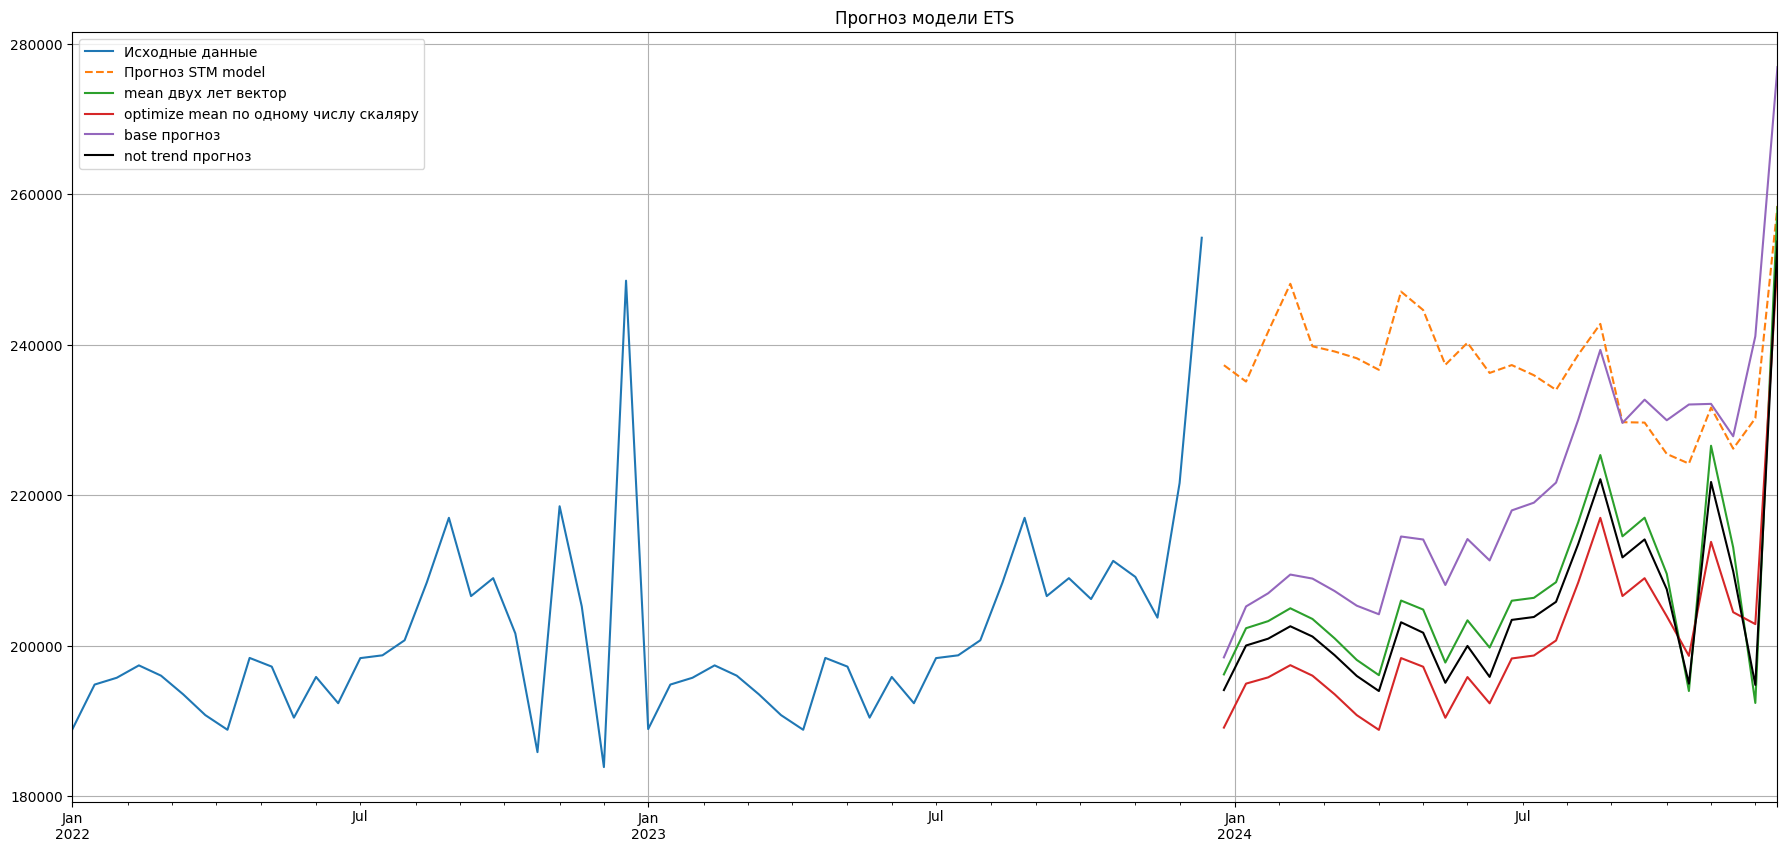

In [405]:
concat_df_new.plot(label='Исходные данные',figsize=(22,10))
forecast.plot(label='Прогноз STM model', linestyle='--')
mean_df['mean'].plot(label='mean двух лет вектор')
forecast_optimize.plot(label='optimize mean по одному числу скаляру')
forecast_base.plot(label='base прогноз')
forecast_not_trend.plot(label='not trend прогноз',color='black')
plt.legend()
plt.title('Прогноз модели ETS')
plt.grid(True)
plt.show()